In [181]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
# sigmoid function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [183]:
'''
banknote authentication using logistic regression

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 
'''
data = pd.DataFrame(pd.read_csv("banknote.csv"))
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())

   variance  skewness  curtosis   entropy  label
0    4.0962   10.1891   -3.93230 -4.18270      0
1    4.2756   -2.6528    2.13750  0.94437      0
2    0.5195   -3.2633    3.08950 -0.98490      0
3    4.0552   -2.4583    2.28060  1.03230      0
4   -2.4473   12.6247    0.73573 -7.66120      0


In [184]:
# preparing training set
X_train = np.array(data)[:, 0:4]
y_train = np.array(data)[:, 4]
y_train = y_train.reshape(1372, 1)
# dimensions
print("training set size: \n")
print("x_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))

training set size: 

x_train: (1372, 4)
y_train: (1372, 1)


In [185]:
# useful variables
iter_l = []
cost_l = []
alpha = 0.001

# length of dataset
m_train = y_train.size

# weights
w = np.zeros([5,1], dtype=float)
print("weight shape: " + str(w.shape))
# adding ones vector in the dataset
X_bias = np.append(np.ones([m_train, 1], dtype=float),X_train, axis=1)
print("X_bias shape:" + str(X_bias.shape))

weight shape: (5, 1)
X_bias shape:(1372, 5)


In [186]:
#######################   NEEDS DEBUGGING   ######################

# gradient descent
for i in range(2000):
    # calculating hypothesis(h)
    h = sigmoid(np.dot(X_bias, w))
    # gradient step
    w = w - (alpha/m_train) * np.sum(h - y_train)
    # cost calculation
    j = 1/(2*m_train) * np.sum((h-y_train)**2)
    iter_l.append(i)
    cost_l.append(j)

In [187]:
# test set prediction
h_train = sigmoid(np.dot(X_bias, w))

# prediction class (prediction is a zeros array)
prediction = np.zeros([m_train, 1], dtype=float)
m_test
# prediction
for i in range(m_train):
    if h_train[i] >=0.5:
        prediction[i] = 1

In [190]:
# metrics
truPN = 0
for i in range(m_train):
    if prediction[i] == y_train[i]:
        truPN += 0
        
print("accuracy: " + str((truPN/m_train)*100))

0
accuracy: 0.0


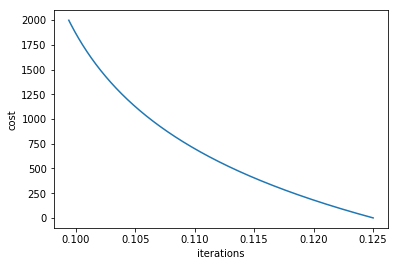

In [189]:
# plotting the learning curve
plt.plot(cost_l, iter_l, '-')
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()